In [1276]:
# Importing the libraries

import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
from selenium.webdriver.common.by import By
import time

In [1277]:
# Let's first connect

driver=webdriver.Chrome(r"/Users/asiya/Desktop/chromedriver\ 4\\chromedriver.exe")

# 1) Write a python program which searches all the product under a particular product from www.amazon.in.
The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

2) In the above question, now scrape the following details of each product listed in first 3 pages of your
search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [1278]:
driver.get("https://www.amazon.in/")

In [1279]:
from selenium.common.exceptions import ElementNotInteractableException

In [1284]:
# search the user input product
search_bar = driver.find_element(By.ID,"twotabsearchtextbox")    
search_bar.clear()                                               
search_bar.send_keys(input('Enter the product you want to search : '))
time.sleep(3)
driver.find_element(By.XPATH,'//div[@class="nav-search-submit nav-sprite"]/span/input').click() 


Enter the product you want to search : guitar


In [32]:
# Finding the name

name=driver.find_elements(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]')
name[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="f8db552b-4791-4ce1-993b-1144241dc080")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="4d044700-e868-49ff-990a-3a5d9a4b3f08")>]

In [33]:
pname=[]
for i in name:
    title=i.text
    pname.append(title)
pname[0:4]

['Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)',
 'Kadence rosewood Guitar Frontier Series, Electric Acoustic Black Guitar With EQ, Die Cast Keys, Set Of Strings, Strap, Picks And Bag (Black EQ, Electric Acoustic)',
 'Kadence Slowhand Premium Jumbo Semi Acoustic Guitar with Heavy Padded Bag, guitar cable, Pro Capo (Black Spruce Wood)',
 'Medellin 38" Acoustic Guitar premium wood with adjustable Truss-rod, free online learning course, Set Of Strings, Strap, Bag and 3 Picks (Black Truss Rod)']

In [37]:
# Finding the Availability
avail=driver.find_elements(By.XPATH,"//span[@class='a-badge-label-inner a-text-ellipsis']")
avail[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="026e2c87-4bdd-4304-973e-78c59a7d949c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="8dfe1f61-6ff8-4511-8699-a0cb64b8e818")>]

In [38]:
# Finding the Availability
availability=[]
for i in avail:
    title1=i.text
    availability.append(title1)
availability

['Deal of the Day',
 'Best seller',
 'Deal of the Day',
 'Deal of the Day',
 'Best seller',
 'Limited time deal',
 "Amazon's Choice",
 '',
 'Best seller',
 'Deal of the Day',
 'Limited time deal',
 'Deal of the Day',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Limited time deal',
 'Best seller',
 'Deal of the Day',
 'Limited time deal',
 'Best seller',
 'Deal of the Day',
 'Best seller',
 'Deal of the Day']

In [39]:
# Finding the price
pri=driver.find_elements(By.XPATH,"//span[@class='a-price-whole']")
pri[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="abc3fa04-f79e-43f1-a818-1a453355e90f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="7e02595d-d50c-4117-b698-62982b29d240")>]

In [40]:

price=[]
for i in pri:
    title1=i.text
    price.append(title1)
price[0:4]

['4,799', '5,199', '14,999', '2,199']

In [41]:
# Finding the expected delivery
ex_del=driver.find_elements(By.XPATH,"//span[@class='a-color-base a-text-bold']")
ex_del[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="a935f31b-cea7-4b44-b146-5849a9a355e5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ceb5404ac41bb92a8b7d96954227283", element="66cdc20d-be49-4331-a21d-d9549ab5d5ad")>]

In [42]:
expected_delivery=[]
for i in ex_del:
    title1=i.text
    expected_delivery.append(title1)
expected_delivery[0:4]

['Wednesday, January 25',
 'Tomorrow, January 24',
 'Tomorrow, January 24',
 'Wednesday, January 25']

In [43]:
# Finding the Urls

url=driver.find_elements(By.XPATH,"//a[@class='a-link-normal s-no-outline']")
urls=[]
for i in url:
    link = i.get_attribute('href')
    urls.append(link)
urls[:4]

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0OTIyMjg5Mjc3MDA3NjQ6MTY3NDQ4MTg0NzpzcF9hdGY6MjAwNjE2MjA2OTYyMDQ6OjA6Og&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref%3Dsr_1_1_sspa%3Fcrid%3D171AZDOZQCX8J%26keywords%3Dguitar%26qid%3D1674481847%26sprefix%3Dguitar%252Caps%252C488%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0OTIyMjg5Mjc3MDA3NjQ6MTY3NDQ4MTg0NzpzcF9hdGY6MjAwNjE1OTg0OTYzMDQ6OjA6Og&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_2_sspa%3Fcrid%3D171AZDOZQCX8J%26keywords%3Dguitar%26qid%3D1674481847%26sprefix%3Dguitar%252Caps%252C488%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1%26smid%3DAM04Z7MH4HSDD',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0OTIyMjg5Mjc3MDA3NjQ6MTY3NDQ4MTg0NzpzcF9hdGY6MjAwNTcxOTMwNTYyMDQ6OjA6Og&url=%2FKadence-Slowhand-Premium-Acoustic-Instrument%2Fdp%2FB077SZ667X%2Fref%3Dsr_1_3_sspa%3Fcrid%3D171AZDOZQCX8J%26ke

In [62]:
len(urls),len(expected_delivery),len(price),len(availability),len(pname)

(64, 64, 64, 64, 64)

In [59]:
# As lenghth was not equal and had missing values so used the -
expected_delivery.extend(["-","-","-","-","-"])

In [61]:
# Did this to make the length equal

del expected_delivery[64:]

del availability[64:]
                

In [46]:
del price[-1]



In [58]:
# Create a Data Frame

page1 = pd.DataFrame({})
page1["productname"] = pname
page1["availability"]=availability
page1["price"]= price
page1["expected_delivery"]=expected_delivery
page1["urls"]=urls
page1.head()

,productname,availability,price,expected_delivery,urls
0,Kadence Frontier guitar with Online Guitar lea...,Deal of the Day,"4,799","Wednesday, January 25",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,"Kadence rosewood Guitar Frontier Series, Elect...",Best seller,"5,199","Tomorrow, January 24",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence Slowhand Premium Jumbo Semi Acoustic G...,Deal of the Day,"14,999","Tomorrow, January 24",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,"Medellin 38"" Acoustic Guitar premium wood with...",Deal of the Day,"2,199","Wednesday, January 25",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Best seller,"2,148","Saturday, January 28",https://www.amazon.in/Juarez-Acoustic-Cutaway-...


In [118]:
# Page 2

next_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[66]/div/div/span/a[3]")
next_button.click()

In [76]:
# Finding the Name from page 2
name2=driver.find_elements(By.XPATH,"//div[@class='a-section a-spacing-none a-spacing-top-small s-title-instructions-style']")
name2[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="837e929b-21fa-4039-8a3f-2a80494df49e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="af5230fd-c6d6-4fba-8eed-09b4edb4377c")>]

In [77]:
pname2=[]
for i in name2:
    title=i.text
    pname2.append(title)
pname2[0:4]

['Sponsored\nGUITAR BRO - COMBO (Blue Acoustic Guitar for Beginner, Guitar Learning Kit, Song Book, Video Lectures, Accessories like Pick, Bag)',
 'Sponsored\nVault DA40 41 Inch Premium Solid Spruce-Top Dreadnought Acoustic Guitar With Allen Key',
 'Yamaha C-40 Fullsized Classic Guitar With Gloss Finish',
 'Medellin MDCF38BK Carbon Fiber Acoustic Guitar With Handrest, Set Of Strings, Strap, Bag, 3 Picks, Capo, Guitar Wall Hanging Stand (Matt, Sunburst)']

In [79]:
# Finding availabilty from page 2
avail=driver.find_elements(By.XPATH,"//span[@class='a-badge-label-inner a-text-ellipsis']")
avail[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="ed21e587-d490-47e4-a117-c1d42d57043f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="16135248-45d7-4196-8676-c0d96f6a0880")>]

In [80]:
availability=[]
for i in avail:
    title1=i.text
    availability.append(title1)
availability

['Deal of the Day',
 'Deal of the Day',
 'Deal of the Day',
 'Deal of the Day',
 'Limited time deal',
 'Limited time deal',
 'Best seller',
 'Deal of the Day']

In [82]:
# Finding the price details from page 2
pri=driver.find_elements(By.XPATH,"//span[@class='a-price-whole']")
pri[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="52d561ad-6672-4d0e-b8d9-ec5c94c62c0e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="66023759-893c-4783-8602-69d0b228f1b8")>]

In [83]:
price=[]
for i in pri:
    title1=i.text
    price.append(title1)
price[0:4]

['8,999', '6,582', '7,590', '2,199']

In [84]:
# Finding expected delivery from page 2

ex_del=driver.find_elements(By.XPATH,"//span[@class='a-color-base a-text-bold']")
ex_del[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="e1dc37c4-5b62-4b82-acf7-0bf28984f526")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2bc2609b03f718b8f80a0336d1f57f35", element="fa74a452-b846-4f08-b4f0-b85e3aee3df6")>]

In [85]:
expected_delivery=[]
for i in ex_del:
    title1=i.text
    expected_delivery.append(title1)
expected_delivery[0:4]

['Friday, January 27',
 'Tuesday, January 31',
 'Friday, January 27',
 'Thursday, January 26']

In [87]:
# Finding the url from page 2

url=driver.find_elements(By.XPATH,"//a[@class='a-link-normal s-no-outline']")
urls=[]
for i in url:
    link = i.get_attribute('href')
    urls.append(link)
urls[:4]


['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODk2NjI3Mzc5NjE0OTA2OjE2NzQ0ODk0MzI6c3BfYXRmX25leHQ6MjAwNDkxMjkxMzYzMDE6OjA6Og&url=%2FGUITAR-BRO-Acoustic-Beginner-Accessories%2Fdp%2FB07TC7TWCR%2Fref%3Dsr_1_49_sspa%3Fcrid%3D14J8ULR7PVUNV%26keywords%3Dguitar%26qid%3D1674489432%26sprefix%3Dguitar%252Caps%252C485%26sr%3D8-49-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4ODk2NjI3Mzc5NjE0OTA2OjE2NzQ0ODk0MzI6c3BfYXRmX25leHQ6MjAwOTI2MjQwMjE0OTg6OjA6Og&url=%2FPremium-Spruce-Top-Dreadnought-Acoustic-Guitar%2Fdp%2FB0BJK1CWSN%2Fref%3Dsr_1_50_sspa%3Fcrid%3D14J8ULR7PVUNV%26keywords%3Dguitar%26qid%3D1674489432%26sprefix%3Dguitar%252Caps%252C485%26sr%3D8-50-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1',
 'https://www.amazon.in/Yamaha-Fullsized-Classic-Guitar-Finish/dp/B005B6EZ36/ref=sr_1_51?crid=14J8ULR7PVUNV&keywords=guitar&qid=1674489432&sprefix=guitar%2Caps%2C485&sr=8-51',
 'https://www.amazon.in/Medellin-Acoustic-spec

In [106]:
# Check the len to check for any null value

len(urls),len(expected_delivery),len(price),len(availability),len(pname2)

(64, 64, 64, 64, 64)

In [95]:
urls.extend(["-","-","-","-","-","-","-","-","-","-"])

In [97]:
urls.extend(["-","-","-","-"])

In [100]:
expected_delivery.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-"])


In [102]:
price.extend(["-","-","-","-","-","-","-","-","-","-","-","-"])

In [104]:
# Did this to make the length equallen(urls).extend(["-",

del availability[64:]


                

In [105]:
pname2.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-","-"])

In [107]:
# Creating a Data Frame
page2 = pd.DataFrame({})
page2["productname"] = pname2
page2["availability"]=availability
page2["price"]= price
page2["expected_delivery"]=expected_delivery
page2["urls"]=urls
page2.head()

,productname,availability,price,expected_delivery,urls
0,Sponsored\nGUITAR BRO - COMBO (Blue Acoustic G...,Deal of the Day,"8,999","Friday, January 27",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Sponsored\nVault DA40 41 Inch Premium Solid Sp...,Deal of the Day,"6,582","Tuesday, January 31",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Yamaha C-40 Fullsized Classic Guitar With Glos...,Deal of the Day,"7,590","Friday, January 27",https://www.amazon.in/Yamaha-Fullsized-Classic...
3,Medellin MDCF38BK Carbon Fiber Acoustic Guitar...,Deal of the Day,"2,199","Thursday, January 26",https://www.amazon.in/Medellin-Acoustic-specai...
4,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,Limited time deal,"2,658","Wednesday, January 25",https://www.amazon.in/Henrix-Acoustic-Guitar-D...


In [121]:
# Page 3

next_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[55]/div/div/span/a[4]")
next_button.click()

In [122]:
# Finding name from page 3

name3=driver.find_elements(By.XPATH,"//div[@class='a-section a-spacing-none a-spacing-top-small s-title-instructions-style']")
name3[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="851b3e89-5ede-42af-bf81-7b1e4a9842cf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="9b979d38-afe7-444b-863a-9b4f45b87da3")>]

In [123]:
pname3=[]
for i in name3:
    title=i.text
    pname3.append(title)
pname3[0:4]

['JUAREZ JRZ41C 41 Inch ACOUSTIC GUITAR WITH ACC (3TS SUNBURST)',
 'Epiphone DR-100 Acoustic Guitar, Vintage Sunburst',
 'Orangewood 6 String Acoustic Guitar, Right, Spruce (OW-DANA-S)',
 'Juârez JRZ38C/VTS 6 Strings Acoustic Guitar 38 Inch Cutaway, Right Handed, Violet/Purple with Bag, Strings, Picks and Strap']

In [124]:
# Finding availibility from page 

avail=driver.find_elements(By.XPATH,"//span[@class='a-badge-label-inner a-text-ellipsis']")
avail[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="899882a0-ab16-45db-aaff-b1436982bca0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="895495e8-dcc2-44f6-ac53-6917b35c7ddb")>]

In [125]:
availability=[]
for i in avail:
    title1=i.text
    availability.append(title1)
availability

['Limited time deal',
 'Deal of the Day',
 'Limited time deal',
 'Deal of the Day',
 'Deal of the Day',
 'Deal of the Day',
 'Limited time deal',
 'Limited time deal',
 'Deal of the Day',
 'Deal of the Day']

In [126]:
# Finding price from page 3

pri=driver.find_elements(By.XPATH,"//span[@class='a-price-whole']")
pri[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="711bf6c6-43d6-4d91-9cdb-da62ef84e5df")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="b1a998ab-e8cb-4297-a289-d74d676aefcd")>]

In [127]:
price=[]
for i in pri:
    title1=i.text
    price.append(title1)
price[0:4]

['4,336', '15,200', '12,999', '3,484']

In [128]:
# Finding expected delivery

ex_del=driver.find_elements_by_xpath("//span[@class='a-color-base a-text-bold']")
ex_del[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="a258f190-5263-4efb-93ae-1fc35ebf0e8f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f548e4ce72a18a6ba273881ecdd316ef", element="fb139cda-c59f-49eb-9b33-24da9095bdf3")>]

In [129]:
expected_delivery=[]
for i in ex_del:
    title1=i.text
    expected_delivery.append(title1)
expected_delivery[0:4]

['Tomorrow, January 24',
 'Thursday, January 26',
 'Wednesday, January 25',
 'Saturday, January 28']

In [130]:
# Finding url from page 3

url=driver.find_elements(By.XPATH,"//a[@class='a-link-normal s-no-outline']")
urls=[]
for i in url:
    link = i.get_attribute('href')
    urls.append(link)
urls[:4]

['https://www.amazon.in/JUAREZ-JRZ41C-ACOUSTIC-GUITAR-SUNBURST/dp/B07X1XQC4Z/ref=sr_1_97?crid=3O80PLAWPCNEQ&keywords=guitar&qid=1674491656&sprefix=guitar%2Caps%2C514&sr=8-97',
 'https://www.amazon.in/Epiphone-DR-100-Acoustic-Vintage-Sunburst/dp/B0002F7IV2/ref=sr_1_98?crid=3O80PLAWPCNEQ&keywords=guitar&qid=1674491656&sprefix=guitar%2Caps%2C514&sr=8-98',
 'https://www.amazon.in/Orangewood-Acoustic-Earthwood-Strings-Included/dp/B07BN8WJN5/ref=sr_1_99?crid=3O80PLAWPCNEQ&keywords=guitar&qid=1674491656&sprefix=guitar%2Caps%2C514&sr=8-99',
 'https://www.amazon.in/JRZ38C-VTS-Strings-Acoustic-Cutaway/dp/B072MFLQC9/ref=sr_1_100?crid=3O80PLAWPCNEQ&keywords=guitar&qid=1674491656&sprefix=guitar%2Caps%2C514&sr=8-100']

In [143]:
len(urls),len(expected_delivery),len(price),len(availability),len(pname2)

(64, 64, 64, 64, 64)

In [132]:
urls.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"])

In [134]:
expected_delivery.extend(["-","-","-","-","-","-","-","-","-","-","-"])

In [136]:
price.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"])

In [140]:
availability.extend(["-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-","-"])

In [142]:
availability.extend(["-"])

In [144]:
# Creating Data Frame for page 3

page3 = pd.DataFrame({})
page3["productname"] = pname2
page3["availability"]=availability
page3["price"]= price
page3["expected_delivery"]=expected_delivery
page3["urls"]=urls
page3.head()

,productname,availability,price,expected_delivery,urls
0,Sponsored\nGUITAR BRO - COMBO (Blue Acoustic G...,Limited time deal,"4,336","Tomorrow, January 24",https://www.amazon.in/JUAREZ-JRZ41C-ACOUSTIC-G...
1,Sponsored\nVault DA40 41 Inch Premium Solid Sp...,Deal of the Day,"15,200","Thursday, January 26",https://www.amazon.in/Epiphone-DR-100-Acoustic...
2,Yamaha C-40 Fullsized Classic Guitar With Glos...,Limited time deal,"12,999","Wednesday, January 25",https://www.amazon.in/Orangewood-Acoustic-Eart...
3,Medellin MDCF38BK Carbon Fiber Acoustic Guitar...,Deal of the Day,"3,484","Saturday, January 28",https://www.amazon.in/JRZ38C-VTS-Strings-Acous...
4,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,Deal of the Day,"18,908","Wednesday, January 25",https://www.amazon.in/Fender-FA125CE-Spruce-Se...


In [148]:
# Creating the Final Data Frame
guitar = pd.concat([page1,page2,page3])
guitar.head()

,productname,availability,price,expected_delivery,urls
0,Kadence Frontier guitar with Online Guitar lea...,Deal of the Day,"4,799","Wednesday, January 25",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,"Kadence rosewood Guitar Frontier Series, Elect...",Best seller,"5,199","Tomorrow, January 24",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence Slowhand Premium Jumbo Semi Acoustic G...,Deal of the Day,"14,999","Tomorrow, January 24",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,"Medellin 38"" Acoustic Guitar premium wood with...",Deal of the Day,"2,199","Wednesday, January 25",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",Best seller,"2,148","Saturday, January 28",https://www.amazon.in/Juarez-Acoustic-Cutaway-...


In [150]:
# saving the dataframe into.csv
guitar.to_csv('file1.csv')

# 3) Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [176]:
driver.get("https://www.google.com/")

In [177]:
search_designation=driver.find_element(By.CLASS_NAME,"gLFyf gsfi")
search_designation.send_keys("images")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".gLFyf gsfi"}
  (Session info: chrome=109.0.5414.87)
Stacktrace:
0   chromedriver                        0x0000000105c64fa8 chromedriver + 4886440
1   chromedriver                        0x0000000105be2643 chromedriver + 4351555
2   chromedriver                        0x0000000105830b27 chromedriver + 477991
3   chromedriver                        0x000000010587576c chromedriver + 759660
4   chromedriver                        0x00000001058759c1 chromedriver + 760257
5   chromedriver                        0x00000001058b9204 chromedriver + 1036804
6   chromedriver                        0x000000010589b5fd chromedriver + 914941
7   chromedriver                        0x00000001058b65fe chromedriver + 1025534
8   chromedriver                        0x000000010589b3a3 chromedriver + 914339
9   chromedriver                        0x000000010586557f chromedriver + 693631
10  chromedriver                        0x0000000105866b1e chromedriver + 699166
11  chromedriver                        0x0000000105c31b9e chromedriver + 4676510
12  chromedriver                        0x0000000105c3691e chromedriver + 4696350
13  chromedriver                        0x0000000105c3e19f chromedriver + 4727199
14  chromedriver                        0x0000000105c3781a chromedriver + 4700186
15  chromedriver                        0x0000000105c0aa62 chromedriver + 4516450
16  chromedriver                        0x0000000105c568c8 chromedriver + 4827336
17  chromedriver                        0x0000000105c56a45 chromedriver + 4827717
18  chromedriver                        0x0000000105c6c7ef chromedriver + 4917231
19  libsystem_pthread.dylib             0x00007ff810a59259 _pthread_start + 125
20  libsystem_pthread.dylib             0x00007ff810a54c7b thread_start + 15


In [179]:
from selenium.common.exceptions import NoSuchElementException

In [182]:
try:
    search_designation=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [183]:
search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("fruits")

In [188]:
images=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
images.click()

In [192]:
image=driver.find_elements(By.XPATH,"//img[@class='rg_i Q4LuWd']")
image[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="127aff13fdb7f32fe50d6c63bc98f34c", element="dd586c69-dfa2-467b-801b-5d950b150d2b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="127aff13fdb7f32fe50d6c63bc98f34c", element="590aaecc-b4d2-4e02-a10c-0860aab74f2b")>]

In [193]:
fruits=[]
for i in image:
    title1=i.text
    fruits.append(title1)
fruits[0:4]

['', '', '', '']

['',
 '',
 '',
 '']
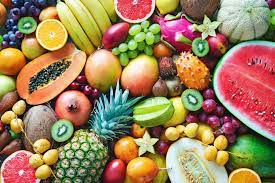
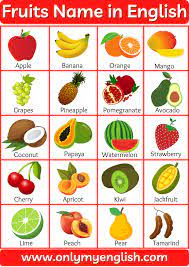
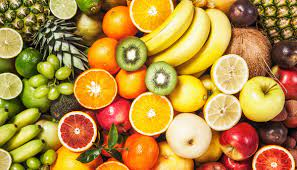
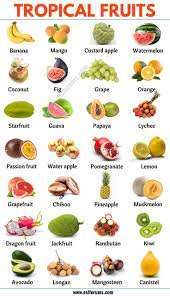

In [196]:
# Image for Fruits

url=driver.find_elements(By.XPATH,"//img[@class='rg_i Q4LuWd']")
urls=[]
for i in url:
    link = i.get_attribute('src')
    urls.append(link)
urls[:4]

In [197]:
# Going for Guitar


driver.get("https://www.google.com/")

In [198]:
try:
    search_designation=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [199]:
search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("guitar")

In [200]:
from selenium.common.exceptions import ElementClickInterceptedException
try:
    search_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [201]:
images=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[3]/a")
images.click()

['',
 '',
 '',
 '']
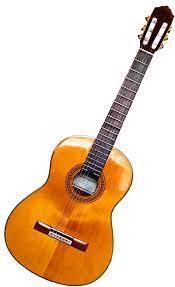
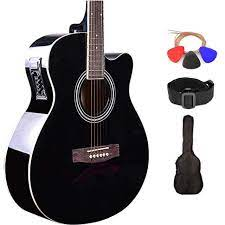
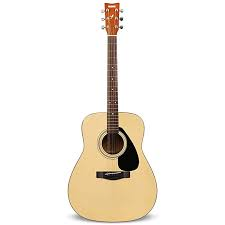
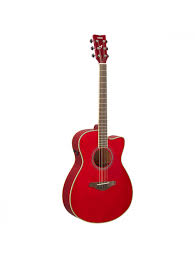

In [202]:
guitar=driver.find_elements(By.XPATH,"//img[@class='rg_i Q4LuWd']")
guitars=[]
for i in guitar:
    link = i.get_attribute('src')
    guitars.append(link)
guitars[:4]

In [203]:
# Fetching Car Image

driver.get("https://www.google.com/")

In [204]:
try:
    search_designation=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [205]:
search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("car")

In [207]:
try:
    search_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [208]:
images=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
images.click()

['',
 '',
 '',
 '']
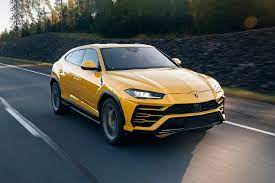
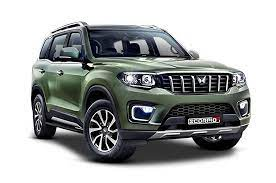
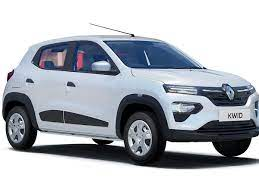
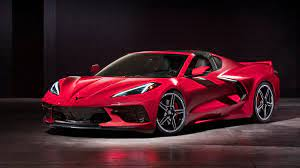

In [210]:
car=driver.find_elements(By.XPATH,"//img[@class='rg_i Q4LuWd']")
cars=[]
for i in car:
    link = i.get_attribute('src')
    cars.append(link)
cars[:4]

In [218]:
# Fetching Machine Learning Images

driver.get("https://www.google.com/")

In [219]:
try:
    search_designation=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [220]:
search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("Machine learning")

In [221]:
try:
    search_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [222]:
images=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[3]/a")
images.click()

['',
 '',
 '',
 '']
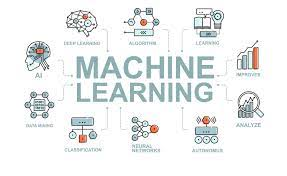
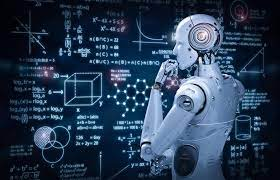
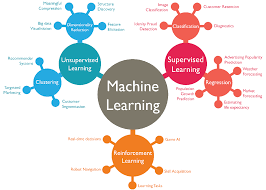
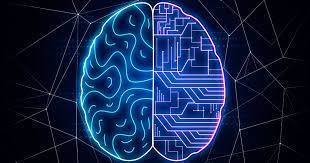

In [223]:
ml=driver.find_elements(By.XPATH,"//img[@class='rg_i Q4LuWd']")
machine_learning=[]
for i in ml:
    link = i.get_attribute('src')
    machine_learning.append(link)
machine_learning[:4]

In [224]:
# Fetching Images for Cakes


driver.get("https://www.google.com/")

In [225]:
try:
    search_designation=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [226]:
search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("cakes")

In [227]:
try:
    search_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [228]:
images=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
images.click()

['',
 '',
 '',
 '']
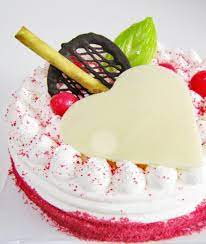
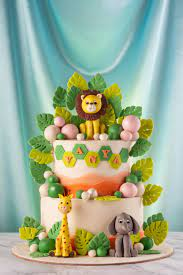
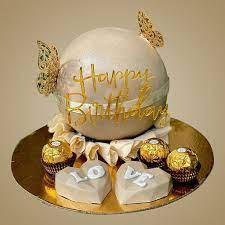
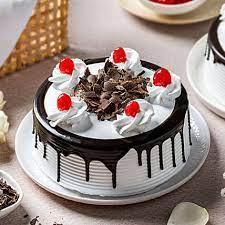

In [230]:
cake=driver.find_elements(By.XPATH,"//img[@class='rg_i Q4LuWd']")
cakes=[]
for i in cake:
    link = i.get_attribute('src')
    cakes.append(link)
cakes[:4]

In [231]:
len(urls),len(cars),len(cakes),len(machine_learning),len(guitars)

(48, 48, 48, 48, 48)

In [232]:
# Creating a DataFrame

various_images = pd.DataFrame({})
various_images["fruits"] = urls
various_images["cars"]=cars
various_images["cakes"]= cakes
various_images["machine_learning"]=machine_learning
various_images["guitars"]=guitars
various_images.head(10)

,fruits,cars,cakes,machine_learning,guitars
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# 4)  Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [255]:
driver.get("http://www.flipkart.com/")

In [256]:
try:
    search_designation=driver.find_element(By.CLASS_NAME,"_3704LK ")
    search_designation.click()
except ElementNotInteractableException as e:
    print(e)

In [257]:
from selenium.common.exceptions import ElementNotInteractableException

In [258]:
# Searching for product Name


search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")
search_option.send_keys("Oneplus Nord, pixel 4A")

In [260]:
search_button=driver.find_element(By.CLASS_NAME,"L0Z3Pu")
search_button.click()

In [261]:
name=driver.find_elements(By.XPATH,"//div[@class='_4rR01T']")
name[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="28f18c984755f824324690fa8a5e5bb2", element="014d2852-21f7-4eb9-aaf4-3f78cbee1d34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="28f18c984755f824324690fa8a5e5bb2", element="af713df6-514f-4c37-a8cb-a08b96f14df3")>]

In [262]:
product_name=[]
for i in name:
    title1=i.text
    product_name.append(title1)
product_name[0:4]

['APPLE iPhone 14 Plus (Blue, 128 GB)',
 'APPLE iPhone 14 Plus (Midnight, 128 GB)',
 'APPLE iPhone 14 Plus (Blue, 256 GB)',
 'APPLE iPhone 14 Plus ((PRODUCT)RED, 256 GB)']

In [264]:
# Fetching the Price

price=driver.find_elements(By.XPATH,"//div[@class='_30jeq3 _1_WHN1']")
price[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="28f18c984755f824324690fa8a5e5bb2", element="8b0b9f18-3cd6-4408-9b8f-b2efb3592103")>,
 <selenium.webdriver.remote.webelement.WebElement (session="28f18c984755f824324690fa8a5e5bb2", element="86341363-986a-43b5-b226-3b12d8b10b00")>]

In [265]:
product_price=[]
for i in price:
    title1=i.text
    product_price.append(title1)
product_price[0:4]

['₹75,999', '₹75,999', '₹85,999', '₹85,999']

In [266]:
# Other Details of the phone

ram_rom=driver.find_elements(By.XPATH,"//li[@class='rgWa7D']")
ram_rom[:2]

[<selenium.webdriver.remote.webelement.WebElement (session="28f18c984755f824324690fa8a5e5bb2", element="4cd058cc-9072-40f0-aee6-01d71d23097f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="28f18c984755f824324690fa8a5e5bb2", element="8d562cdd-5ae4-4bc2-bf05-3dc52737e0cc")>]

In [267]:
ram_rom_size=[]
for i in ram_rom:
    title1=i.text
    ram_rom_size.append(title1)
ram_rom_size

['128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 '128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 '256 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 '256 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 '128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bi

In [268]:
len(ram_rom_size),len(product_price),len(product_name)

(124, 24, 24)

In [269]:
124/24

5.166666666666667

In [271]:
R=[['128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
  ['128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
  ['256 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
   ['256 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
 ['128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
 ['512 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['512 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
 [ '512 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '15.24 cm (6 inch) Full HD Display',
 '16MP Rear Camera | 16MP + 8MP Dual Front Camera',
 '4000 mAh Battery',
 'Qualcomm MSM8976 Pro Snapdragon 653 Processor',
 'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories'],
['64 GB ROM',
 '13.97 cm (5.5 inch) Retina HD Display',
 '12MP + 12MP | 7MP Front Camera',
 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor',
 'Brand Warranty of 1 Year',],
['64 GB ROM',
 '13.97 cm (5.5 inch) Retina HD Display',
 '12MP + 12MP | 7MP Front Camera',
 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor',
 'Brand Warranty of 1 Year'],
['128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['256 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['32 GB ROM',
 '13.97 cm (5.5 inch) Retina HD Display',
 '12MP Rear Camera | 5MP Front Camera',
 'Apple A9 64-bit processor and Embedded M9 Motion Co-processor',
 'Brand Warranty of 1 Year'],
['64 GB ROM',
 '13.97 cm (5.5 inch) Retina HD Display',
 '12MP + 12MP | 7MP Front Camera',
 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor',
 'Brand Warranty of 1 Year'],
[ '256 GB ROM',
 '13.97 cm (5.5 inch) Retina HD Display',
 '12MP + 12MP | 7MP Front Camera',
 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor',
 'Brand Warranty of 1 Year'],
['256 GB ROM',
 '13.97 cm (5.5 inch) Retina HD Display',
 '12MP + 12MP | 7MP Front Camera',
 'A11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor Processor',
 'Brand Warranty of 1 Year'],
['256 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['128 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['512 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['1 GB RAM | 8 GB ROM | Expandable Upto 32 GB',
 '10.16 cm (4 inch) WVGA Display',
 '5MP Rear Camera | 2MP Front Camera',
 '1600 mAh Li-ion Battery',
 'SC9832 Processor',
 '1 Year'],
['512 GB ROM',
 '17.02 cm (6.7 inch) Super Retina XDR Display',
 '12MP + 12MP | 12MP Front Camera',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories'],
['3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '15.9 cm (6.26 inch) HD+ Display',
 '13MP + 2MP | 13MP Front Camera',
 '4050 mAh Battery',
 'Spreadtrum Processor',
 'Brand Warranty of 1 Year Available for Mobile'],
[ '4 MB RAM | 4 MB ROM',
 '4.5 cm (1.77 inch) Display',
 '0MP Front Camera',
 '1000 mAh Lithium Ion Battery',
 'MTK6261D Processor',
 '1 Year Manufacturer Warranty For Device And 6 Months Manufacturer Warranty For In-Box Accessories Including Battery From The Date Of Purchase']]

 

In [272]:
len(R)

24

In [279]:
# Creating a Data Frame

phone_details = pd.DataFrame({})
phone_details["product name and color"] = product_name
phone_details["price"]=product_price
phone_details["ram / rom / camera / processor / battery"]= R
phone_details

,product name and color,price,ram / rom / camera / processor / battery
0,"APPLE iPhone 14 Plus (Blue, 128 GB)","₹75,999","[128 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
1,"APPLE iPhone 14 Plus (Midnight, 128 GB)","₹75,999","[128 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
2,"APPLE iPhone 14 Plus (Blue, 256 GB)","₹85,999","[256 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
3,"APPLE iPhone 14 Plus ((PRODUCT)RED, 256 GB)","₹85,999","[256 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
4,"APPLE iPhone 14 Plus (Purple, 128 GB)","₹76,999","[128 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
5,"APPLE iPhone 14 Plus (Starlight, 512 GB)","₹1,05,999","[512 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
6,"APPLE iPhone 14 Plus (Midnight, 512 GB)","₹1,05,999","[512 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
7,"APPLE iPhone 14 Plus (Purple, 512 GB)","₹1,05,999","[512 GB ROM, 17.02 cm (6.7 inch) Super Retina ..."
8,"OPPO F3 Plus (Gold, 64 GB)","₹30,990",[4 GB RAM | 64 GB ROM | Expandable Upto 256 GB...
9,"APPLE iPhone 8 Plus (Silver, 64 GB)","₹49,900","[64 GB ROM, 13.97 cm (5.5 inch) Retina HD Disp..."


In [280]:
# saving the dataframe into.csv
phone_details.to_csv('file2.csv')

# 5) Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.


In [451]:
# Let's first connect

driver=webdriver.Chrome(r"/Users/asiya/Desktop/chromedriver\ 4\\chromedriver.exe")

driver.get("https://www.google.com/")



In [501]:
# Imports

from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import re 

In [454]:
try:
    search_designation=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search_designation.click()
except NoSuchElementException as e:
    print(e)

In [455]:
search_option=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_option.send_keys("Chennai google map")

In [456]:
try:
    search_button=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[2]/div[2]/div[5]/center/input[1]")
    search_button.click()
except ElementClickInterceptedException as e:
    print(e)

In [457]:
maps=driver.find_element(By.XPATH,"/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a")
maps.click()

In [468]:
right=driver.find_element(By.XPATH,"/html/body/div[3]/div[9]/div[23]/div[1]/div[2]/div[2]/div/div[2]/div[3]/button")
right.click()

In [477]:
location=driver.find_elements(By.XPATH,"/html/body/div[3]/div[9]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]/h2/span")
location

[<selenium.webdriver.remote.webelement.WebElement (session="b8d0e8bb5a1976a92ab17def0b213e83", element="b5521972-b5db-4179-ab4b-ef8e1d59414d")>]

In [478]:
latitude_longitude=[]
for i in location:
    title=i.text
    latitude_longitude.append(title)
latitude_longitude

['12.856713, 80.083357']

# 6) # Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.


In [500]:
# Let's first connect

driver=webdriver.Chrome(r"/Users/asiya/Desktop/chromedriver\ 4\\chromedriver.exe")

In [503]:
url="https://trak.in/india-startup-funding-investment-2015/"

In [504]:
driver.get(url1)

In [509]:
# Fetching the Date

jandate=driver.find_elements(By.XPATH,"//td[@class='column-2']")
jandate[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="b2675bcb-b504-4b88-b5b2-4eb8e102edd7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="ce6b301a-755f-40b7-a405-7ff669d11f7c")>]

In [510]:
january_date=[]
for i in jandate:
    title1=i.text
    january_date.append(title1)
january_date[0:2]

['01/04/2021', '05/04/2021']

In [511]:
# Fetching the Name

janname=driver.find_elements(By.XPATH,"//td[@class='column-3']")
janname[0:2]


[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="4841862b-3cc7-4ce9-80ee-97f26121cd4f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="2405c8b1-4db2-4cb9-b9f1-25a313068938")>]

In [512]:
january_name=[]
for i in janname:
    title1=i.text
    january_name.append(title1)
january_name[5:29]

['DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo']

In [513]:
# Fetching the Industry

ind=driver.find_elements(By.XPATH,"//td[@class='column-4']")
ind[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="d88f9def-ab68-4f97-9ea1-9608a6d42342")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="5dd1e6c7-7d92-48be-84c3-afd6036a4815")>]

In [514]:
industry=[]
for i in ind:
    title1=i.text
    industry.append(title1)
industry[0:2]

['Edu-tech', 'E-commerce']

In [515]:
# Fetching the subvertical

subver=driver.find_elements(By.XPATH,"//td[@class='column-5']")
subver[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="944d83d5-6951-4e0b-8122-c1d74946b480")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="c16b5efd-5939-4b37-8107-d07cc98effa0")>]

In [516]:
subvirtical=[]
for i in subver:
    title1=i.text
    subvirtical.append(title1)
subvirtical[0:2]

['Online tutoring', 'Online reselling platform']

In [517]:
# Fetching the Location

loca=driver.find_elements(By.XPATH,"//td[@class='column-6']")
loca[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="801e5bca-0f85-4734-afeb-fa3b744f0efb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="75641f95-6356-4810-a44a-938747b2a666")>]

In [518]:
location=[]
for i in loca:
    title1=i.text
    location.append(title1)
location[0:2]

['Bengaluru', 'Bengaluru']

In [520]:
# Fecthing the nvestor

inves=driver.find_elements(By.XPATH,"//td[@class='column-7']")
inves[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="55e60c0b-9c09-4174-9b5f-36240d3c4d0b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="d22650bc-f664-4a4d-8115-4838056d06ce")>]

In [521]:
investor=[]
for i in inves:
    title1=i.text
    investor.append(title1)
investor[0:2]

['Innoven Capital', 'SoftBank Vision Fund 2']

In [522]:
# Fetching the investment

invest=driver.find_elements(By.XPATH,"//td[@class='column-8']")
invest[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="8bd0bb14-469a-47bb-b38a-3586311354a2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="131d7d3e-c932-4d87-9a0b-b0db8f4bf8e7")>]

In [523]:
investment=[]
for i in invest:
    title1=i.text
    investment.append(title1)
investment[0:2]

['Series F', 'Series E']

In [524]:
# Fetching the amount

amm=driver.find_elements(By.XPATH,"//td[@class='column-9']")
amm[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="b5077c87-309f-47ac-a1a1-57392a22a976")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a8cb27a707cd6acdfc1be5612654b5ab", element="3cd1f4d0-a71a-42c8-9fd1-ad9f3b045f4b")>]

In [525]:
ammount=[]
for i in amm:
    title1=i.text
    ammount.append(title1)
ammount[0:2]

['460,000,000', '300,000,000']

In [526]:
len(january_date),len(january_name),len(industry),len(subvirtical),len(location),len(investor),len(investment),len(ammount)

(392, 392, 392, 392, 392, 392, 392, 392)

In [527]:
funding_deals = pd.DataFrame({})
funding_deals["date"] = january_date[5:29]
funding_deals["company name"]=january_name[5:29]
funding_deals["industry"]= industry[5:29]
funding_deals["subvirtical"]=subvirtical[5:29]
funding_deals["location"]=location[5:29]
funding_deals["investor"] = investor[5:29]
funding_deals["investment"]=investment[5:29]
funding_deals["ammount"]= ammount[5:29]
funding_deals

,date,company name,industry,subvirtical,location,investor,investment,ammount
0,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,25/03/2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,"11,000,000"
6,26/03/2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,"27,500,000"
7,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
8,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
9,19/02/2021,Fingerlix,Hospitality,Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"


# 7) Write a program to scrap all the available details of best gaming laptops from digit.in

In [584]:
# Let's first connect

driver=webdriver.Chrome(r"/Users/asiya/Desktop/chromedriver\ 4\\chromedriver.exe")

In [549]:
url="https://www.digit.in/top-products/best-gaming-laptops-40.html"

In [550]:
driver.get(url)

In [551]:
Brands=[]
Products_Description=[]
Specification=[]
Price=[]

In [553]:
# Fetching Brand
br=driver.find_elements(By.XPATH,"//div[@class='TopNumbeHeading']")
len(br)

9

In [566]:
# Fetching Brand
br=driver.find_elements(By.XPATH,"//div[@class='TopNumbeHeading active']")
len(br)

1

In [567]:
for i in br:
   
    Brands.append(str(i.text).replace("\n",""))
if i.text is None :
        Company.append("--") 
Brands

['1.MSI Titan GT77-12UHS',
 '2.Alienware X17 R2',
 '3.Acer Predator Triton 500 SE PT516-52s',
 '4.Omen By HP (16-B1371TX)',
 '5.Acer Predator Helios 300 AN515-45',
 '6.MSI Delta 15 (A5EFK-083IN)',
 '7.Omen By HP (16-C0141AX)',
 '8.Lenovo Legion 5i Pro (82RF00MGIN)',
 '9.Alienware M15 R5 Ryzen Edition Icc-C780001win',
 '10.Lenovo Slim 7 Gen 6 (82K8002JIN)']

In [555]:
# Fetching the specification

sp=driver.find_elements(By.XPATH,"//div[@class='Specs-Wrap']")
len(sp)

10

In [557]:
for i in sp:
   
    Specification.append(str(i.text).replace("\n",""))
Specification

['Windows 11 Home OS17.3" (3840 x 2160) Display12th Gen Intel Core i9-12900HX | NA Processor2 TB SSD/64 GB DDR5 Memory',
 'Windows 11 Home OS17.3" (1920 x 1080) Display12th Gen Intel Core i9-12900H | 5 GHz Processor1 TB SSD/32 GB DDR5 Memory',
 'Windows 11 OS16" (2560 x 1600) Display12th Gen Intel Core i7-12700H | 3.5 GHz Processor2 TB SSD/32 GB DDR5 Memory',
 'Windows 11 Home OS16.1" (2560 x 1440) Display12th Gen Intel Core i7-12700H | 4.7 GHz Processor1 TB SSD/8 GB DDR5 Memory',
 'Windows 11 Home OS15.6" (2560 x 1440) DisplayAMD Ryzen 9-5900HX | NA Processor512 GB SSD/16 GB DDR4 Memory',
 'Windows 11 Home OS15.6" (1920 x 1080) DisplayAMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor1 TB SSD/16 GBGB DDR4 Memory',
 'Windows 11 Home OS16.1" (2560 x 1440) DisplayAMD Ryzen™ 9 5900HX | 3.3 GHz Processor1 TB NVMe/16 GB DDR4 Memory',
 'Windows 11 Home OS16" (2560 x 1600) Display12th Gen Intel Core i7-12700H | 2.3 GHz Processor1 TB SSD/16 GB DDR5 Memory',
 'Windows 11 Home OS15.6" (1920 x 1080) D

In [560]:
# Fetching product description
des=driver.find_elements(By.XPATH,"//div[@class='Section-center']")
len(des)

10

In [561]:
for i in des:
   
    Products_Description.append(str(i.text).replace("\n",""))
Products_Description

['The very best MSI gaming laptop featuring an Intel processor is the MSI TITAN GT77 - 12UHS. This is the top of the line model from MSI’s recent refresh of their entire gaming lineup and is powered by the Intel Core i9-12900HX which is a 16 Core (8P+8E) processor that has 24 threads and a maximum Turbo power of 157 Watts. The graphics card in this laptop is the NVIDIA RTX 3080 Ti and it too sports a high TGP of 175 Watts. This is one of the most powerful CPU+GPU combinations with plenty of thermal headroom to allow it to operate at higher clock speeds for longer time periods. As for the memory, the MSI GT77-12UHS can have up to 128 GB of DDR5 memory but ships with 64 GB DDR5 clocked at 4800 MT/s. Being a 12th Gen machine also means that the motherboard has PCIe Gen 5.0 lanes for storage devices such as M.2 SSDs. The GT77-12UHS has four M.2 slots of which one slot is PCIe Gen 5 whereas the remaining three are PCIe Gen 4 slots. Then there’s also the display, the GT77-12UHS features a ma

In [562]:
# Fetching price information
pri=driver.find_elements(By.XPATH,"//td[@class='smprice']")
len(pri)

10

In [563]:
for i in pri:
   
    Price.append(str(i.text).replace("\n",""))
Price

['N/A',
 '₹ 389,990',
 '₹ 229,990',
 '₹ 176,490',
 '₹ 172,999',
 '₹ 188,990',
 '₹ 124,990',
 '₹ 167,990',
 '₹ 174,000',
 '₹ 131,990']

In [568]:
digit_lap=pd.DataFrame([])
digit_lap['Brands']=Brands[0:10]
digit_lap['Price']=Price[0:10]
digit_lap['Specification']=Specification[0:10]
digit_lap['Description']=Products_Description[0:10]
digit_lap

,Brands,Price,Specification,Description
0,1.MSI Titan GT77-12UHS,N/A,"Windows 11 Home OS17.3"" (3840 x 2160) Display1...",The very best MSI gaming laptop featuring an I...
1,2.Alienware X17 R2,"₹ 389,990","Windows 11 Home OS17.3"" (1920 x 1080) Display1...","Alienware, the premium gaming brand from Dell ..."
2,3.Acer Predator Triton 500 SE PT516-52s,"₹ 229,990","Windows 11 OS16"" (2560 x 1600) Display12th Gen...",The Predator lineup from Acer has shown great ...
3,4.Omen By HP (16-B1371TX),"₹ 176,490","Windows 11 Home OS16.1"" (2560 x 1440) Display1...",Omen by HP is a premium gaming lineup which is...
4,5.Acer Predator Helios 300 AN515-45,"₹ 172,999","Windows 11 Home OS15.6"" (2560 x 1440) DisplayA...",Acer Predator Helios 300 AN515-45 is the best ...
5,6.MSI Delta 15 (A5EFK-083IN),"₹ 188,990","Windows 11 Home OS15.6"" (1920 x 1080) DisplayA...",The best MSI gaming laptop with an AMD process...
6,7.Omen By HP (16-C0141AX),"₹ 124,990","Windows 11 Home OS16.1"" (2560 x 1440) DisplayA...",Another worthy gaming laptop from the Omen lin...
7,8.Lenovo Legion 5i Pro (82RF00MGIN),"₹ 167,990","Windows 11 Home OS16"" (2560 x 1600) Display12t...",Lenovo has gone a little mainstream with their...
8,9.Alienware M15 R5 Ryzen Edition Icc-C780001win,"₹ 174,000","Windows 11 Home OS15.6"" (1920 x 1080) DisplayA...",Dell not only has gaming laptops under the Del...
9,10.Lenovo Slim 7 Gen 6 (82K8002JIN),"₹ 131,990",Windows 11 Home OS15.6 MP | NA DisplayLenovo R...,Lenovo has been pushing for thinner gaming lap...


# 8) Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [682]:
driver.get("http://www.forbes.com/")

In [683]:
search_button=driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div/div/div")
search_button.click()

In [685]:
search_button=driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[2]/div[3]/ul/li[1]/a")
search_button.click()

In [686]:
# Fetching the Names

bill=driver.find_elements(By.XPATH,"//div[@class='personName']")
bill[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="f54e145b-c5e3-434b-8f9c-fff9cefc511e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="0f5de3af-d564-4cd9-8efc-a0aa9c4cf0e8")>]

In [688]:
names=[]
for i in bill:
    title1=i.text
    names.append(title1)
names[0:2]

['Elon Musk', 'Jeff Bezos']

In [689]:
# Fetching the networth
worth=driver.find_elements(By.XPATH,"//div[@class='netWorth']")
worth[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="7057fe70-ba0f-4de6-97b1-2727d18dbae0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="5dc55e39-d454-48d2-9290-e19714f3fc19")>]

In [690]:
networth=[]
for i in worth:
    title1=i.text
    networth.append(title1)
networth[0:2]

['$219 B', '$171 B']

In [691]:
# Fetching the country

coun=driver.find_elements(By.XPATH,"//div[@class='countryOfCitizenship']")
coun[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="3b1b308d-34ad-4b6c-af8e-6eba54186614")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="21a4402a-5c25-444a-bc39-161f38c6d6eb")>]

In [692]:
country=[]
for i in coun:
    title1=i.text
    country.append(title1)
country[0:2]

['United States', 'United States']

In [693]:
# Fetching the source

sour=driver.find_elements(By.XPATH,"//div[@class='source']")
sour[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="92f8aca1-e9d8-4710-9baf-429c8f08ad96")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="eefe1c52-068e-408f-9ae4-0e97c7d56ca9")>]

In [694]:
source=[]
for i in sour:
    title1=i.text
    source.append(title1)
source[0:2]

['Tesla, SpaceX', 'Amazon']

In [695]:
# Fetching the Industry

ind=driver.find_elements(By.XPATH,"//div[@class='category']")
ind[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="480a3b45-6553-42b7-9335-bd6d5196fc20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="db5d449c842aae7bd72084c20553f361", element="b36e419d-cf88-457d-b6d6-9be3523055a5")>]

In [696]:
industry=[]
for i in ind:
    title1=i.text
    industry.append(title1)
industry[0:5]

['Automotive',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Finance & Investments']

In [697]:
len(names),len(networth),len(country),len(source),len(industry)

(200, 200, 200, 200, 200)

In [698]:
# Creating a Data Frame

billonaire_details = pd.DataFrame({})
billonaire_details["name"] = names
billonaire_details["networth"]=networth
billonaire_details["country"] = country
billonaire_details["source"]=source
billonaire_details["industry"] = industry
billonaire_details

,name,networth,country,source,industry
0,Elon Musk,$219 B,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,$171 B,United States,Amazon,Technology
2,Bernard Arnault & family,$158 B,France,LVMH,Fashion & Retail
3,Bill Gates,$129 B,United States,Microsoft,Technology
4,Warren Buffett,$118 B,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...
195,Marcel Herrmann Telles,$10.3 B,Brazil,beer,Food & Beverage
196,Leon Black,$10 B,United States,private equity,Finance & Investments
197,Joe Gebbia,$10 B,United States,Airbnb,Technology
198,David Geffen,$10 B,United States,"movies, record labels",Media & Entertainment


# 9)  Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [1261]:
# Importing the libraries

import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
from selenium.webdriver.common.by import By
import time

In [1262]:
# Let's first connect

driver=webdriver.Chrome(r"/Users/asiya/Desktop/chromedriver\ 4\\chromedriver.exe")

In [1263]:
# opening the url
driver.get('https://www.youtube.com/')



In [1264]:
# Clicking on any Random Video
driver.find_element(By.XPATH,'/html/body/ytd-app/div/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[2]/div/ytd-rich-item-renderer[2]/div/ytd-rich-grid-media/div[1]/div[2]').click()

In [1265]:
# Pausing the video
driver.find_element(By.XPATH,'/html/body/ytd-app/div/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[1]').click()


  

In [1266]:
# 1000 time we scroll down by 10000 in order to generate more Comment

for _ in range(100):

    driver.execute_script("window.scrollBy(0,10000)")

    time.sleep(5)

In [1267]:
# Scrapping required details:

#Creating Empty Lists
Comment = []
Upvote = []
Time = []

# Scraping Comments 
C = driver.find_elements(By.ID,"content-text")
for i in C:
    Comment.append(i.text)
    
#Scrapping Upvotes
try:
    U = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
    for i in U:
        Upvote.append(i.text)
except NoSuchElementException:
    Upvote.append("-")

#Scrapping when comment was posted 
try:
    T = driver.find_elements(By.XPATH,"//a[contains(text(),'ago')]")

    for i in T:
        Time.append(i.text)
except NoSuchElementException:
    Time.append("-")

In [1268]:
print(len(Comment),len(Upvote),len(Time))

1298 1298 1298


In [1269]:
df = pd.DataFrame({'Comments':Comment[:500],
                   'Comment upvote':Upvote[:500],
                   'time when comment was posted':Time[:500]})

df

,Comments,Comment upvote,time when comment was posted
0,मेरे Meditation app को Join करो: Level SuperMi...,233,2 months ago
1,"""Humara naaptol zindagi maut se hain, humare n...",122,1 month ago
2,Tears of joy and immense respect for our Armed...,67,1 month ago
3,Proud of being Indian citizen Bcoz of The Real...,26,1 month ago
4,AND Also Big thanks to Ranveer & TRS Team for ...,16,1 month ago
...,...,...,...
495,Salute to this great personality.,,2 months ago
496,RTI ka koi faida nahi kyunki sahi information...,,1 month ago
497,Proud Punjabi and Indian ️️,,1 month ago
498,Proud to be Bhartiya,,2 weeks ago


# 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [1164]:
# Importing libraries
import pandas as pd
import selenium
import time
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import requests
import re

In [1165]:
# Let's first connect

driver=webdriver.Chrome(r"/Users/asiya/Desktop/chromedriver\ 4\\chromedriver.exe")

In [1166]:
# opening the url
driver.get('https://www.hostelworld.com/')

In [1167]:
search_option=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input")
search_option.send_keys("London")

In [1168]:
london=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div")
london.click()

In [1169]:
search=driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[5]/button")
search.click()

In [1195]:
# Scrapping required details: 
#scraping hostel name, distance from city centre, ratings, total reviews, overall reviews, 
#privates from price, dorms from price, facilities and property description.

#Creating Empty Lists
Name = []
Distance = []
Rating = []
Reviews = []
Overall = []
Privates = []
Dorms = []
Facilities = []
Property = []


# Scraping Names 
N = driver.find_elements(By.XPATH,'//h2[@class="title title-6"]')
for i in N:
    Name.append(i.text)
    
#Scrapping distance from city centre
try:
    D = driver.find_elements(By.XPATH,'//span[@class="description"]')
    for i in D:
        Distance.append(i.text)
except NoSuchElementException:
    Distance.append("-")

#Scrapping ratings
try:
    RT = driver.find_elements(By.XPATH,'//div[@class="rating rating-summary-container big"]')
    for i in RT:
        Rating.append(i.text[:][0:3])
except NoSuchElementException:
    Rating.append("-")
    
#Scrapping total reviews
try:
    RV = driver.find_elements(By.XPATH,'//div[@class="reviews"]')
    for i in RV:
        Reviews.append(i.text)
except NoSuchElementException:
    Reviews.append("-")
    
#Scrapping overall reviews
try:
    O = driver.find_elements(By.XPATH,'//div[@class="keyword"]')
    for i in O:
        Overall.append(i.text)
except NoSuchElementException:
    Overall.append("-")
    
#Scrapping privates from price
P = driver.find_elements(By.XPATH,'//div[@class="price-col"]')[0::2]
for i in P:
    Privates.append(i.text.replace('\n',': ').replace('No Privates Available','NaN'))
       
#Scrapping Dorms from price
P = driver.find_elements(By.XPATH,'//div[@class="price-col"]')[1::2]
for i in P:
    Dorms.append(i.text.replace('\n',': ').replace('No Dorms Available','NaN'))
    
#Scrapping Facilities
try:
    F = driver.find_elements(By.XPATH,'//div[@class="facilities-label facilities"]')
    for i in F:
        Facilities.append(i.text.replace('\n',', '))
except NoSuchElementException:
    Facilities.append("-")
    
#Scrapping property description.
try:
    PD = driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]')
    for i in PD:
        Property.append(i.text.replace('\n',', '))
except NoSuchElementException:
    Property.append("-")

# Not displaying the proper facilities

In [1196]:
print(len(Name),len(Distance),len(Rating),len(Reviews),len(Privates),len(Dorms),len(Facilities),len(Property))

30 30 30 30 30 30 30 30


In [1197]:
#scraping hostel name, distance from city centre, ratings, total reviews, overall reviews, 
#privates from price, dorms from price, facilities and property description.
# Creating Data Frame 
df = pd.DataFrame({'Hostel name':Name,
                   'Distance from city centre':Distance,
                   'Rating':Rating,
                   'Total reviews':Reviews,
                   'Privates from price':Privates,
                   'Dorms from price':Dorms,
                   'Facilities':Facilities,
                   'Property description':Property})
df

,Hostel name,Distance from city centre,Rating,Total reviews,Privates from price,Dorms from price,Facilities,Property description
0,NX London Hostel,Hostel - 6.1km from city centre,7.9,1547 Total Reviews,Privates From: Rs11038.31 Rs7727,Dorms From: Rs2457.16 Rs1966,"Free WiFi, Free Breakfast","Perfect Location, Marvellous Staff, Excellent ..."
1,Wombat's City Hostel London,Hostel - 3.6km from city centre,8.9,14520 Total Reviews,Privates From: Rs14394.32 Rs11515,Dorms From: Rs4187.61 Rs3350,"Free WiFi, Follows Covid-19 sanitation guidance","Perfect Location, Superb Staff, Fantastic Clea..."
2,St Christopher's Village,Hostel - 1.8km from city centre,8.0,11867 Total Reviews,NaN,Dorms From: Rs1895.21 Rs1706,"Free WiFi, Follows Covid-19 sanitation guidance","Perfect Location, Marvellous Staff, Excellent ..."
3,Hostel One Notting Hill,Hostel - 5.5km from city centre,9.4,1714 Total Reviews,Privates From: Rs10875,Dorms From: Rs3708,Free WiFi,"Perfect Location, Superb Staff, Fantastic Clea..."
4,Generator London,Hostel - 3km from city centre,7.7,7333 Total Reviews,Privates From: Rs7324,Dorms From: Rs2155,"Free WiFi, Follows Covid-19 sanitation guidance","Perfect Location, Marvellous Staff, Excellent ..."
5,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,7.3,4798 Total Reviews,NaN,Dorms From: Rs2850,"Free WiFi, Follows Covid-19 sanitation guidance","Wonderful Location, Marvellous Staff, Excellen..."
6,Urbany Hostel London,Hostel - 5.4km from city centre,9.2,630 Total Reviews,Privates From: Rs8897,Dorms From: Rs2602,"Free WiFi, Follows Covid-19 sanitation guidance","Perfect Location, Superb Staff, Fantastic Clea..."
7,Smart Hyde Park Inn Hostel,Hostel - 5km from city centre,7.4,6495 Total Reviews,NaN,Dorms From: Rs2846.19 Rs2562,Free WiFi,"Perfect Location, Marvellous Staff, Awesome Cl..."
8,Astor Museum Inn,Hostel - 2.2km from city centre,8.0,9160 Total Reviews,Privates From: Rs12294,NaN,"Free WiFi, Follows Covid-19 sanitation guidance","Perfect Location, Superb Staff, Excellent Clea..."
9,Safestay London Kensington Holland Park,Hostel - 5.9km from city centre,7.1,1416 Total Reviews,NaN,Dorms From: Rs2334,Free WiFi,"Wonderful Location, Brilliant Staff, Awesome C..."
